In [1]:
import pandas as pd
import numpy as np

# Matrix-Matrix products

In [16]:
# we have 3 people corresponding to each row of the below dataframe
people = pd.DataFrame()
people["roll"] = [6, 3, 3]
people["bun"] = [5, 6, 4]
people["cake"] = [3, 2, 3]
people["bread"] = [1, 2, 1]
people

,roll,bun,cake,bread
0,6,5,3,1
1,3,6,2,2
2,3,4,3,1


In [18]:
# product prices in shop 1 and 2
shops = pd.DataFrame()
shops["s1"] = [1.50, 2.00, 5.00, 16.00]
shops["s2"] = [1.00, 2.50, 4.50, 17.00]
shops

,s1,s2
0,1.5,1.0
1,2.0,2.5
2,5.0,4.5
3,16.0,17.0


In [28]:
# find the best choice (best shop) for each person given the qunatity of
# products they want to buy
p = people.values
s = shops.values

# this gives us the information on how much would each person
# pay in each shop
prod = p.dot(s)
print(pd.DataFrame(prod))

# minimum price for each person
print(pd.DataFrame(prod.min(axis=1)))

# the shop number where the person pays the least
print(pd.DataFrame(prod.argmin(axis=1)))

      0     1
0  50.0  49.0
1  58.5  61.0
2  43.5  43.5
      0
0  49.0
1  58.5
2  43.5
   0
0  1
1  0
2  0


# Image operations (filters)

In [34]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [35]:
mnist = fetch_openml("mnist_784", version=1)
X = mnist["data"].reshape((70000, 28, 28)) / 255
y = mnist["target"].astype(int)
X.shape, y.shape

((70000, 28, 28), (70000,))

5


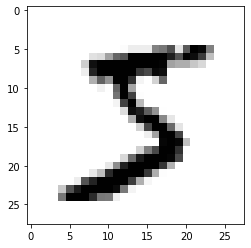

In [39]:
plt.imshow(X[0], cmap="binary");
print(y[0])

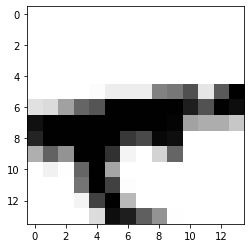

In [43]:
# zooming on the image
plt.imshow(X[0, 0:14, 8:22], cmap="binary");

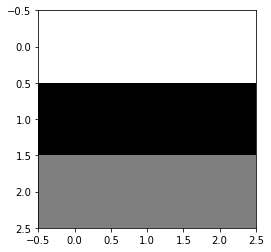

In [83]:
# top edge detection
top = np.array([[-1, -1, -1],
                [1, 1, 1],
                [0, 0, 0]])
plt.imshow(top, cmap="binary");

In [54]:
from scipy.ndimage.filters import correlate, convolve

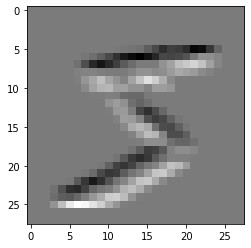

In [58]:
# use the "top" filter to detect top edges of the image
# (this is element-wise multiplication)
corrtop = correlate(X[0], top)
plt.imshow(corrtop, cmap="binary");

In [62]:
# rotating matrix 90 degress to the left
np.rot90(top)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

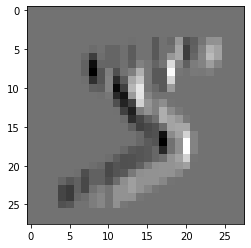

In [66]:
# using rotated filter to detect left edges
plt.imshow(correlate(X[0], np.rot90(top, 1)), cmap="binary");

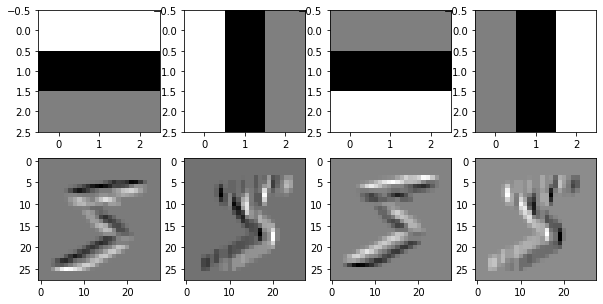

In [82]:
# detecting top, left, right and bottom edges
fig, ax = plt.subplots(figsize=(10, 5), nrows=2, ncols=4)
for i in range(4):
    ax[0][i].imshow(np.rot90(top, i), cmap="binary")
for i in range(4):
    ax[1][i].imshow(correlate(X[0], np.rot90(top, i)), cmap="binary")
plt.show()

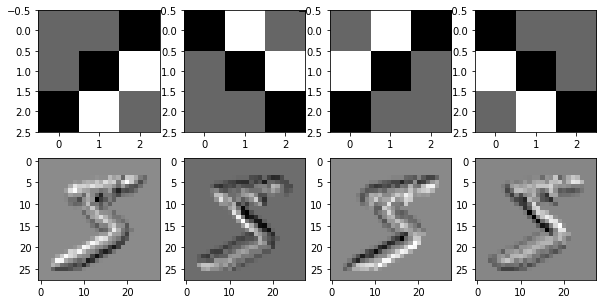

In [81]:
# detecting diagonals
fig, ax = plt.subplots(figsize=(10, 5), nrows=2, ncols=4)
br = np.array([[0, 0, 1],
               [0, 1, -1.5],
               [1, -1.5, 0]])
for i in range(4):
    ax[0][i].imshow(np.rot90(br, i), cmap="binary")
for i in range(4):
    ax[1][i].imshow(correlate(X[0], np.rot90(br, i)), cmap="binary")
plt.show()

# floating point arithmetics

In [86]:
def f(x: float) -> float:
    if x <= 1/2:
        return x * 2 
    else:
        return x * 2 - 1
    
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [91]:
import scipy.linalg as la
np.set_printoptions(suppress=True, precision=4)

A = np.array([[1, 1000], [0, 1]])
B = np.array([[1, 1000], [0.001, 1]])
print(A)
print(B)

[[   1 1000]
 [   0    1]]
[[   1.    1000.   ]
 [   0.001    1.   ]]


In [94]:
# computing eigenvalues
wA, vrA = la.eig(A)
wB, vrB = la.eig(B)
print(wA)
print(wB)

[1.+0.j 1.+0.j]
[2.+0.j 0.+0.j]
